## BIS Self Control  as a predictor of the number cigarette smoked
**This is private data. Please do not share**

* __Date:__ 2017 - 12 - 06
* __Version:__ 1 
* __Editors:__ Fionn Delahunty 
* __Code:__ R

------- 
This notebook (R code) investigates if DOSPERT Scale (Risk Taking in a Recreational context) as a predictor of the number cigarette smoked in the sample data

Summary of steps
1. Dataset import 
2. Testing distribution of self control measure 
3. Testing distribution of car crash measure 
4. Analysis of Approach 1
5. Analysis of Apporach 2 
6. Summary
------


### 1. Dataset Import

In [54]:
# Dataset Import 
data <- read.csv(file="Risklab_2.5.csv", header=TRUE, sep=",")
names(data)
head(data)

[1] "ID"                                                                            
 [2] "X"                                                                             
 [3] "Timestamp"                                                                     
 [4] "GENDER"                                                                        
 [5] "AGE"                                                                           
 [6] "DATE_OF_BIRTH"                                                                 
 [7] "NATIONALITY"                                                                   
 [8] "COUNTRY_OF_RESIDENCE"                                                          
 [9] "ENGLISH_FIRST_LENGUAGE"                                                        
[10] "IF_NOT_ENGLISH_SPECIFY"                                                        
[11] "HIGHEST_LEVEL_EDUCATION"                                                       
[12] "OCCUPATION"                                                                    
[13] "DOMINANT_HAND"                                                                 
[14] "DO_YOU_DRIVE"                                                                  
[15] "CURRENTLY_LEARNING_DRIVE"                                                      
[16] "CURRENTLY_HOLD_LEARNING_DRIVER_PERMIT"                                         
[17] "CURRENTLY_HOLD_FULL_DRIVING_LICENSE"                                           
[18] "RECEIVE_FULL_DRIVING_LICENSE"                                                  
[19] "AGE_STARTED_DRIVING"                                                           
[20] "AVERAGE_KM_MILEAGE_PER_YEAR"                                                   
[21] "HAVE_PENALTY_POINTS"                                                           
[22] "PENALTY_POINTS_FOR_WHAT"                                                       
[23] "COLLISIONS_LAST_TWO_YEARS"                                                     
[24] "HOW_MANY_COLLISIONS_LAST_TWO_YEARS"                                            
[25] "HOW_SERIOUS_COLLISIONS"                                                        
[26] "FOR_HOW_MANY_WERE_CULPABLE"                                                    
[27] "EVER_SMOKED"                                                                   
[28] "SMOKE_CURRENTLY"                                                               
[29] "HOW_MANY_YEARS_SMOKING"                                                        
[30] "HOW_MANY_CIGARETTES_PER_WEEK"                                                  
[31] "EVER_DRANK_ALCOHOL"                                                            
[32] "DRINK_CURRENTLY"                                                               
[33] "HOW_MANY_YEARS_DRINKING"                                                       
[34] "HOW_MUCH_UNITS_OF_ALCOHOL_PER_WEEK"                                            
[35] "PREVIOUSLY_DIAGNOSED_HEALTH_CONDITION_REQUIRING_SIGNIFICANT_LIFESTYLE_CHANGES."
[36] "CONSIDER_YOURSELF_RISKTAKER"                                                   
[37] "DEAL_WITH_RISK_AND_UNCERTANTLY_DAILY_BASIS"                                    
[38] "Admitting.that.your.tastes.are.different.from.those.of.a.friend"               
[39] "BIS_Cog_Instability"                                                           
[40] "BIS_Perseverance"                                                              
[41] "BIS_self_control"                                                              
[42] "BIS_Cog_Complexity"                                                            
[43] "DOS_Ethical"                                                                   
[44] "DOS_Fin_Investment"                                                            
[45] "DOS_Fin_Gambling"                                                              
[46] "DOS_HealthSafety"                                                              
[47] "DOS_Recreational"                      

ID,X,Timestamp,GENDER,AGE,DATE_OF_BIRTH,NATIONALITY,COUNTRY_OF_RESIDENCE,ENGLISH_FIRST_LENGUAGE,IF_NOT_ENGLISH_SPECIFY,...,DOS_Ethical,DOS_Fin_Investment,DOS_Fin_Gambling,DOS_HealthSafety,DOS_Recreational,DOS_Social,Number_of_Crashes,BIS_Crashes,Smoking,BIS_self_control_2
63371,431,6/13/13 14:43,Male,25,11/24/87,British,France,Yes,NA,...,14,13,11,36,32,40,3,14,1,14
64443,389,06/12/2013 13:15,Female,18,12/13/94,American/Irish,USA,Yes,NA,...,24,8,8,22,38,38,1,15,1,15
62799,106,5/22/13 13:50,Male,22,11/26/90,Dutch,Netherlands,No,Dutch,...,24,12,13,22,36,36,NA,NA,1,16
62885,1497,10/22/13 11:38,Female,26,02/08/1986,American,USA,Yes,NA,...,12,21,17,24,17,25,NA,NA,1,19
62889,1476,10/22/13 10:54,Male,20,03/02/1993,French,France,No,French,...,22,10,3,32,35,27,NA,NA,1,15
62914,198,5/28/13 14:03,NA,35,8/18/77,Irish,Ireland,Yes,NA,...,16,12,4,18,36,35,NA,NA,1,17


### 2. Testing distribution of risk taking measure

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
X1,1,264,15.39394,2.682878,15,15.35849,2.9652,9,22,13,0.0880023,-0.4803899,0.1651197


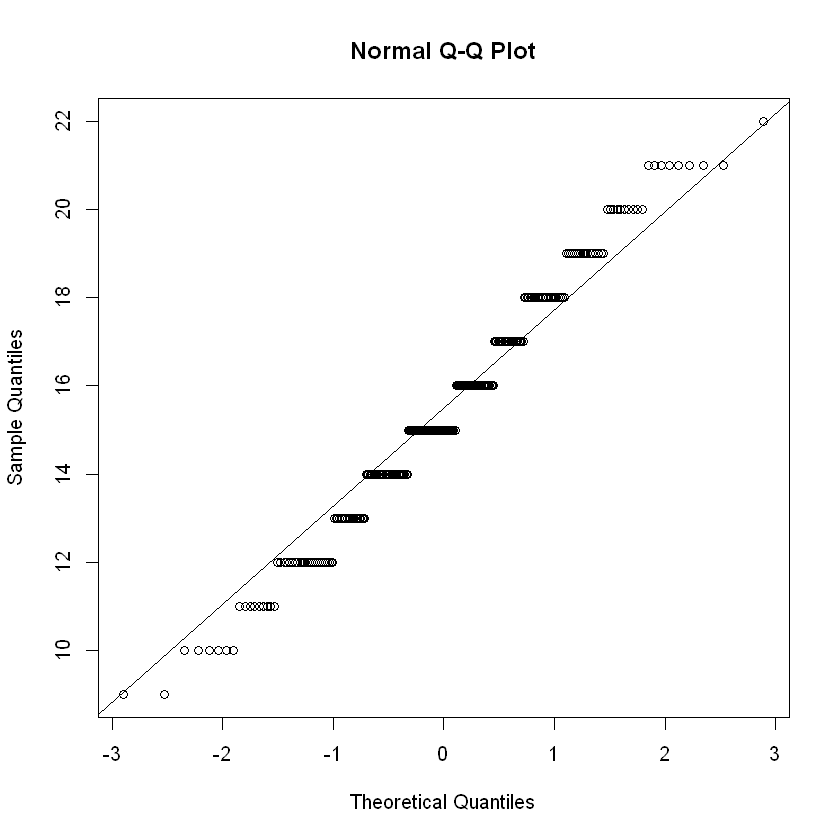

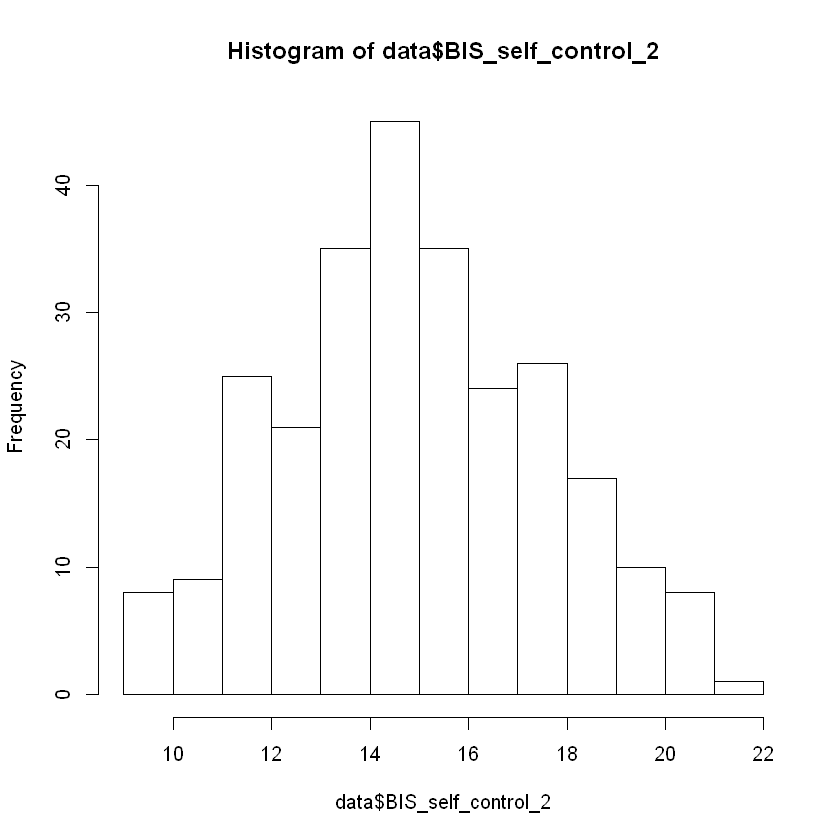

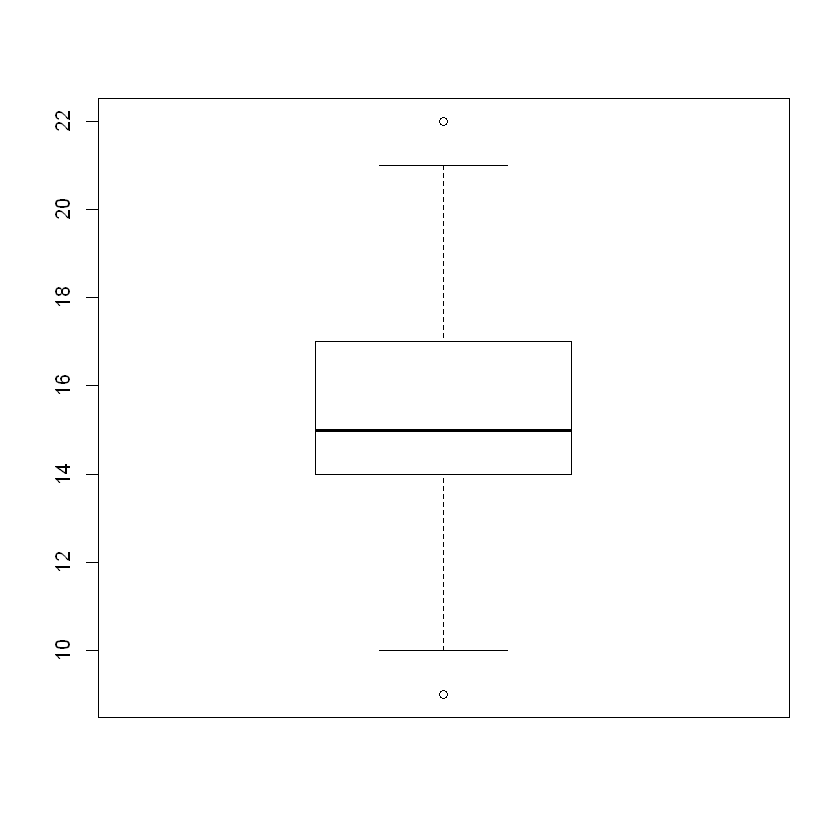

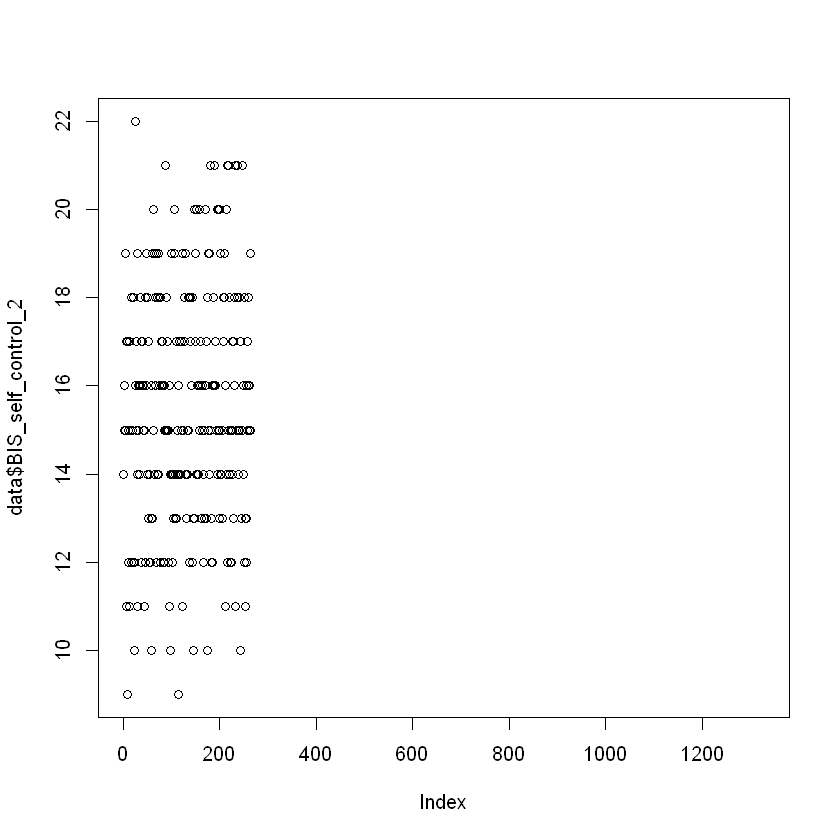

In [47]:
library(psych)
describe(data$BIS_self_control_2)

qqnorm(data$BIS_self_control_2)
qqline(data$BIS_self_control_2)

hist(data$BIS_self_control_2)
boxplot(data$BIS_self_control_2)

plot(data$BIS_self_control_2)



---


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
X1,1,264,52.875,55.7389,35,44.81604,45.9606,1,420,419,2.034355,7.531952,3.430492


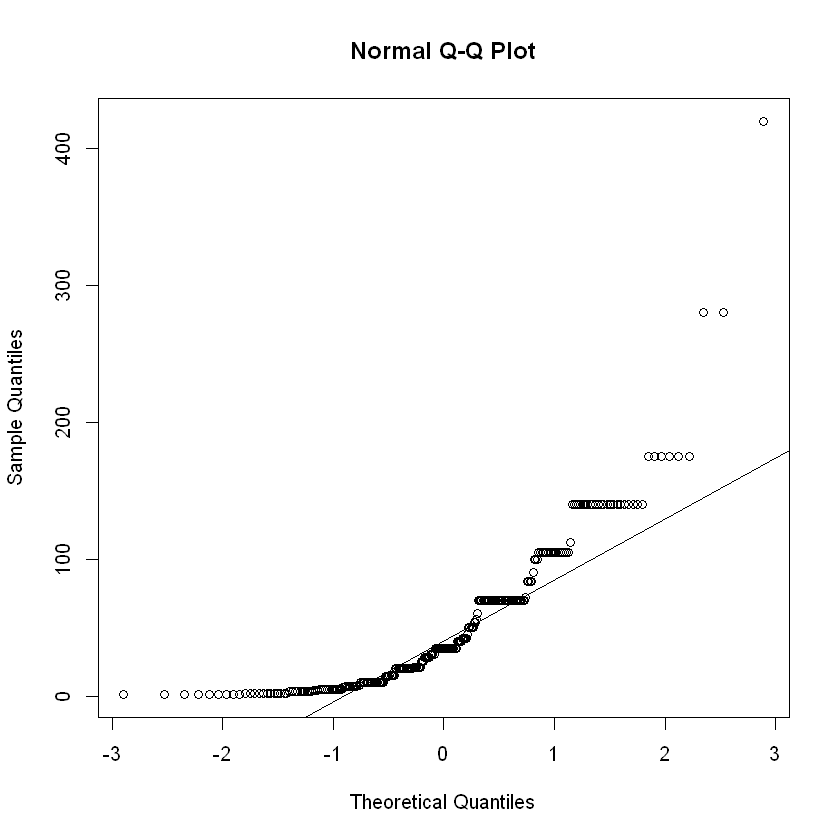

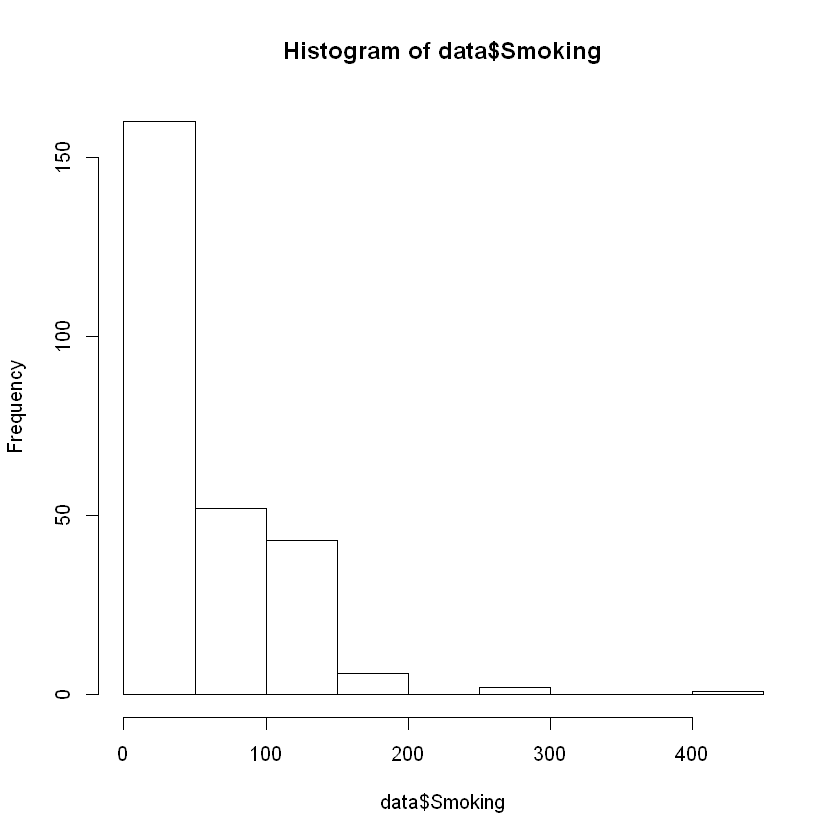

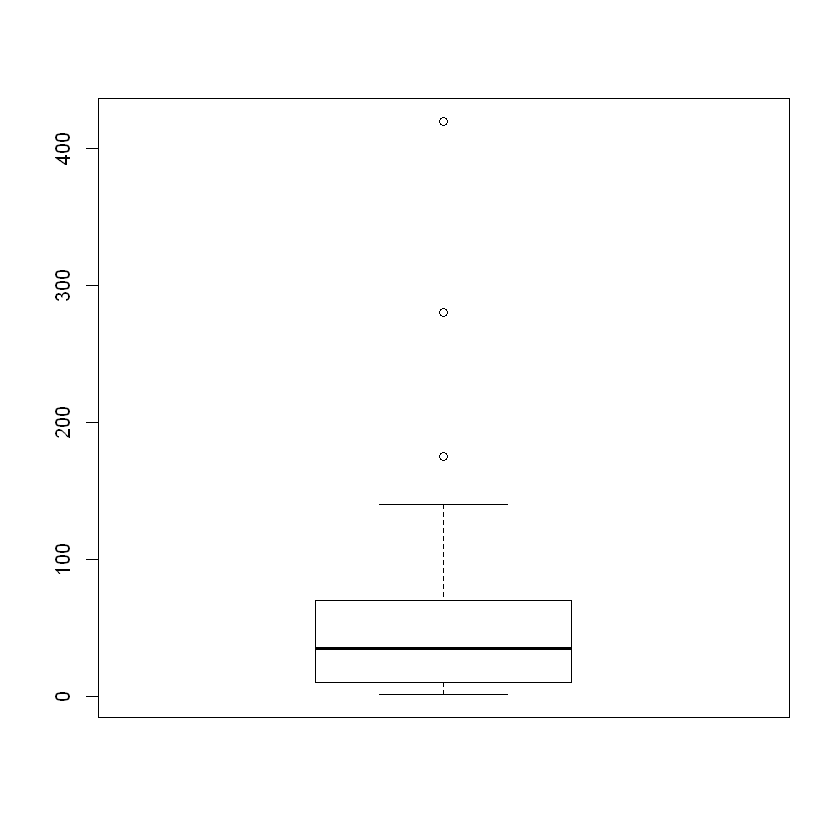

In [56]:
library(psych)

describe(data$Smoking)

qqnorm(data$Smoking)
qqline(data$Smoking)

hist(data$Smoking)
boxplot(data$Smoking)

c1
   (0,25]   (25,50]   (50,75]  (75,100] (100,125] (125,150] (150,175] 
      113        47        44         8        19        24         6 

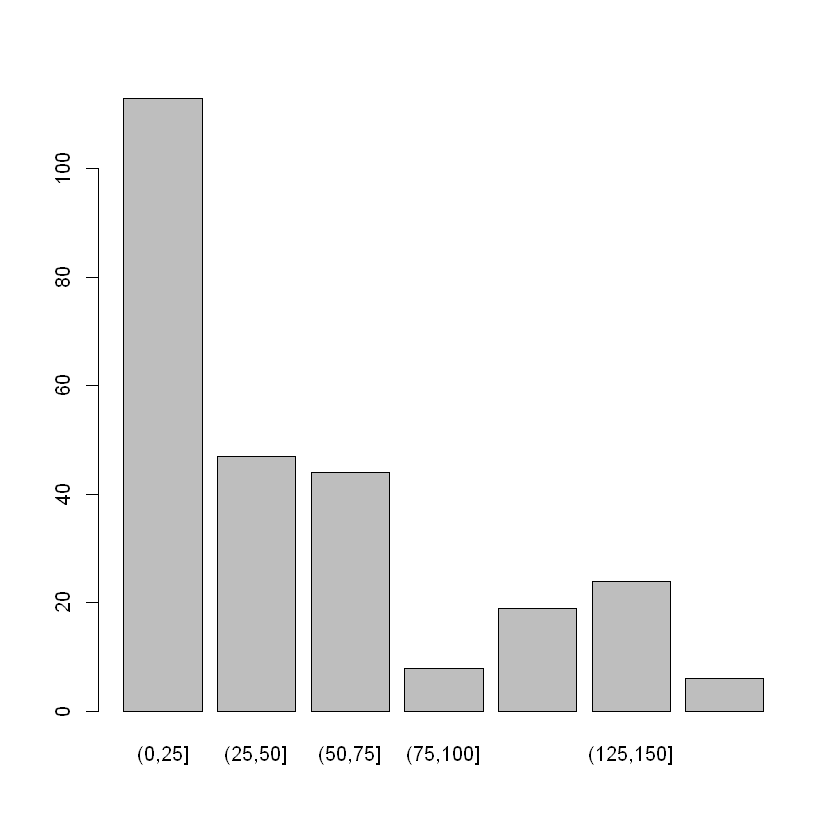

In [94]:
c1 <- cut(data$Smoking, breaks = seq(0, 175, by = 25))
table(c1)
plot(c1)

c2
 (7,10] (10,13] (13,16] (16,19] (19,22] 
      8      55     115      67      19 

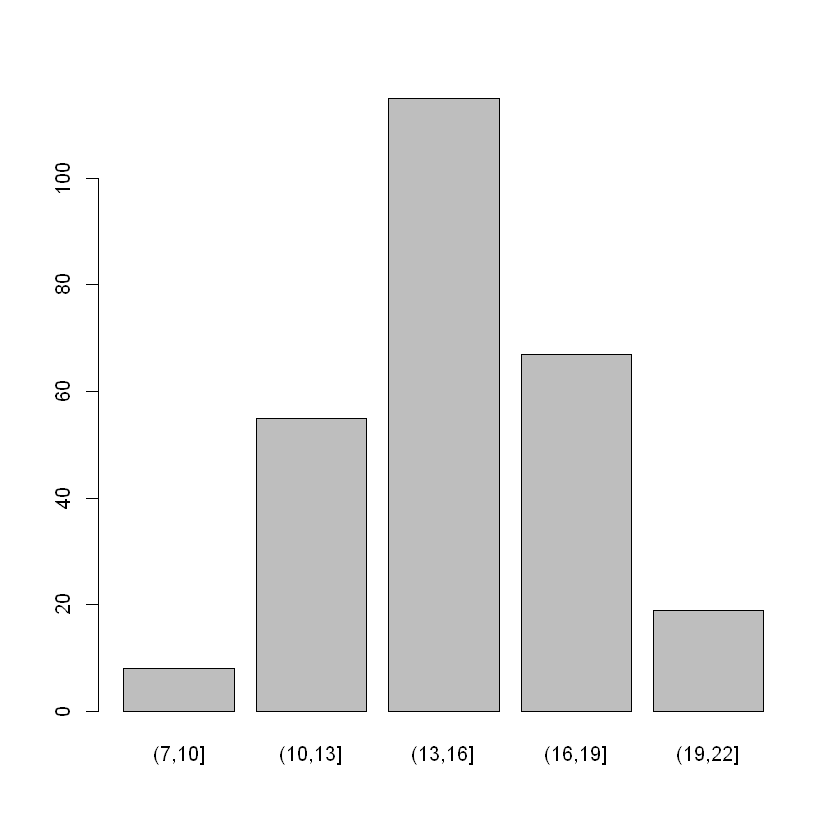

In [99]:
c2 <- cut(data$BIS_self_control_2, breaks = seq(7, 22, by = 3))
table(c2)
plot(c2)

               Df Sum Sq Mean Sq F value Pr(>F)
as.factor(c2)   4   9184    2296   0.736  0.568
Residuals     259 807911    3119               
1064 observations deleted due to missingness


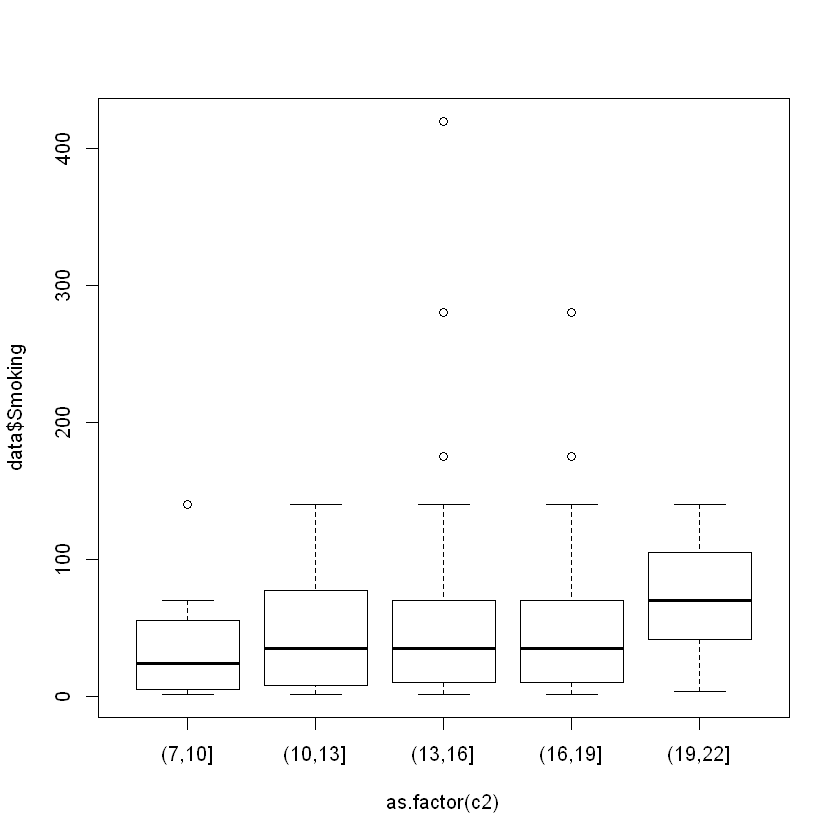

In [106]:
plot(data$Smoking ~ as.factor(c2))
fit <- aov(data$Smoking ~ as.factor(c2) )
print(summary(fit))

In [80]:
## Normal Linear Regression 
mm<-lm(data$BIS_self_control_2~c1,)



print(summary(mm))



Call:
lm(formula = data$BIS_self_control_2 ~ c1)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.5745 -1.7368 -0.1239  1.8761  6.8761 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 15.12389    0.25419  59.499   <2e-16 ***
c1(25,50]    0.45057    0.46899   0.961    0.338    
c1(50,75]    0.53520    0.48015   1.115    0.266    
c1(75,100]   0.75111    0.98856   0.760    0.448    
c1(100,125]  0.61295    0.66999   0.915    0.361    
c1(125,150] -0.08223    0.60731  -0.135    0.892    
c1(150,175]  1.20944    1.13202   1.068    0.286    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.702 on 254 degrees of freedom
  (1067 observations deleted due to missingness)
Multiple R-squared:  0.0134,	Adjusted R-squared:  -0.009902 
F-statistic: 0.5751 on 6 and 254 DF,  p-value: 0.75



[1] NA

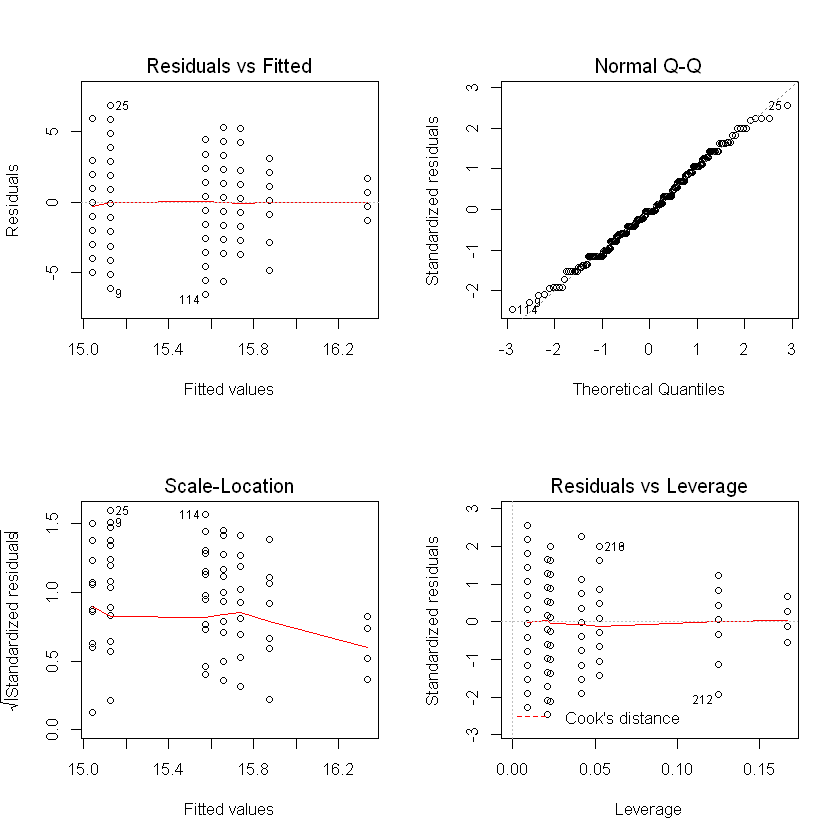

In [86]:
par(mfrow=c(2,2))
plot(mm)
p<-locator()
cooksd<-cooks.distance(mm)



In [81]:
## Step wise regression 

library(MASS)
fit <- lm(data$BIS_self_control_2~c1,)
step <- stepAIC(fit, direction="both")
step$anova # display results

Start:  AIC=525.78
data$BIS_self_control_2 ~ c1

       Df Sum of Sq    RSS    AIC
- c1    6    25.194 1879.7 517.30
<none>              1854.5 525.78


ERROR: Error in stepAIC(fit, direction = "both"): number of rows in use has changed: remove missing values?


In [90]:
model <- step(mm)
summary(model)

Start:  AIC=525.78
data$BIS_self_control_2 ~ c1

       Df Sum of Sq    RSS    AIC
- c1    6    25.194 1879.7 517.30
<none>              1854.5 525.78


ERROR: Error in step(mm): number of rows in use has changed: remove missing values?
